In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ot

from functions import *
from noisy_graphs import *
from sample_graphs import *
from frank_wolfe import *
from grampa import *
from eigenalign import *
from isorank import *
from Electrical_network import *
from cuvature import *

In [22]:
#Compare GW and FAQplus on ER

def normise(L, A, B):
    return np.linalg.norm(A.toarray() - L @ B.toarray() @ L.T)

def normise_trace(L, A, B):
    return np.trace(L.T @ A.T @ L @ B)

def construit_liste_n(n, t, p, s):
    Ps = rand_perm_matrix(n)
    x = [n] * t
    Label = ['FAQ+','Entropic GW','id']
    L = []
    Lo = []
    L_trace = []
    for i in x:
        print(i)
        A_eq, b_eq = bistochastic_equality_constraints(i)
        G0, G1, A0, A1 = sample_correlated_geometric(i, p, 3, s)

        Li = []
        Li2 = []
        Li3 = []

        Faqp = project_to_perm(faqplus(A0, A1, 200, Pstar=Ps ,plot=False), A_eq, b_eq)
        Li.append(normise(Faqp, A0, A1)) #Faq+
        Li2.append(overlap(np.eye(i), Faqp))
        Li3.append(normise_trace(Faqp, A0, A1))

        EntropicGW = project_to_perm(ot.gromov.entropic_gromov_wasserstein(A0.toarray(), A1.toarray(),epsilon=0.1, loss_fun='square_loss'), A_eq, b_eq)
        Li.append(normise(EntropicGW, A0, A1))#EntropicGW
        Li2.append(overlap(np.eye(i), EntropicGW))
        Li3.append(normise_trace(EntropicGW, A0, A1))

        Li2.append(overlap(np.eye(i), np.eye(i)))
        Li.append(normise(np.eye(i), A0, A1))
        Li3.append(normise_trace(np.eye(i), A0, A1))

        L.append(Li)
        Lo.append(Li2)
        L_trace.append(Li3)
    return L, L_trace, Lo, Label, x, p, s

def compare_correlation(n, t, p): #better to tke : p ~ log(n)/n
    for i in range(1, 10, 1):
        L, L_trace, Lo, Label, x, p, s =construit_liste_n(n, t, p, i/10)
        norm_plot_n(L, Label, x, p, s)
        plt.show()
        norm_plot_n(L_trace, Label, x, p, s, model="trace")
        plt.show()
        norm_plot_n(Lo, Label, x, p, s, model="overlap")
        plt.show()

def construit_non_projected_n(n, t, p, s):
    Ps = rand_perm_matrix(n)
    x = [n] * t
    Label = ['FAQ+','Entropic GW','id']
    L = []
    Lo = []
    L_trace = []
    for i in x:
        print(i)
        A_eq, b_eq = bistochastic_equality_constraints(i)
        G0, G1, A0, A1 = sample_correlated_geometric(i, p, 3, s)

        Li = []
        Li2 = []
        Li3 = []

        Faqp = faqplus(A0, A1, 200, Pstar=Ps ,plot=False)
        Li.append(normise(Faqp, A0, A1)) #Faq+
        Li2.append(overlap(np.eye(i), Faqp))
        Li3.append(normise_trace(Faqp, A0, A1))

        EntropicGW = n * ot.gromov.entropic_gromov_wasserstein(A0.toarray(), A1.toarray(),epsilon=0.1, loss_fun='square_loss')
        Li.append(normise(EntropicGW, A0, A1))#EntropicGW
        Li2.append(overlap(np.eye(i), EntropicGW))
        Li3.append(normise_trace(EntropicGW, A0, A1))

        Li2.append(overlap(np.eye(i), np.eye(i)))
        Li.append(normise(np.eye(i), A0, A1))
        Li3.append(normise_trace(np.eye(i), A0, A1))

        L.append(Li)
        Lo.append(Li2)
        L_trace.append(Li3)
    return L, L_trace, Lo, Label, x, p, s

def compare_correlation_non_projected(n, t, p): #better to take : p ~ log(n)/n
    for i in range(1, 10, 1):
        L, L_trace, Lo, Label, x, p, s =construit_non_projected_n(n, t, p, i/10)
        norm_plot_n(L, Label, x, p, s)
        plt.show()
        norm_plot_n(L_trace, Label, x, p, s, model="trace")
        plt.show()
        norm_plot_n(Lo, Label, x, p, s, model="overlap")
        plt.show()

def means_of_list(L, Label): #compute M the list of the means of the m iterations of the precedent algorithm
    n = len(Label)
    m = len(L)
    M = []
    for i in range(n):
        L_aux = 0
        for j in range(m):
            L_aux += L[j, i]
        L_aux = L_aux/m
        M.append(L_aux)
    return M

def compare_means(n, t, p): #TO FINFISH !!!!!
    M = np.zeros()
    for i in range(1, 10, 1):
        L, L_trace, Lo, Label, x, p, s =construit_non_projected_n(n, t, p, i/10)
        Mi = means_of_list(L, Label)
        M.append(Mi)
    


In [4]:
L, L_trace, Lo, Label, x, p, s= construit_liste_n(40, 10, 0.6, 0.5)

40
40
40
40
40
40
40
40
40
40


In [24]:
print(L)

[[np.float64(16.0), np.float64(10.369345480271084), np.float64(12.328828005937952)], [np.float64(13.564659966250536), np.float64(10.18190609305449), np.float64(12.96148139681572)], [np.float64(12.489995996796797), np.float64(10.665671379053615), np.float64(13.711309200802088)], [np.float64(11.916375287812984), np.float64(10.802854681675822), np.float64(12.083045973594572)], [np.float64(11.135528725660043), np.float64(9.825095080266513), np.float64(10.954451150103322)], [np.float64(11.916375287812984), np.float64(11.083786958291636), np.float64(12.727922061357855)], [np.float64(13.114877048604), np.float64(10.909265246112527), np.float64(13.856406460551018)], [np.float64(10.954451150103322), np.float64(9.964840191479995), np.float64(11.313708498984761)], [np.float64(12.569805089976535), np.float64(10.21181496321963), np.float64(12.727922061357855)], [np.float64(10.583005244258363), np.float64(9.396953785990684), np.float64(11.135528725660043)]]


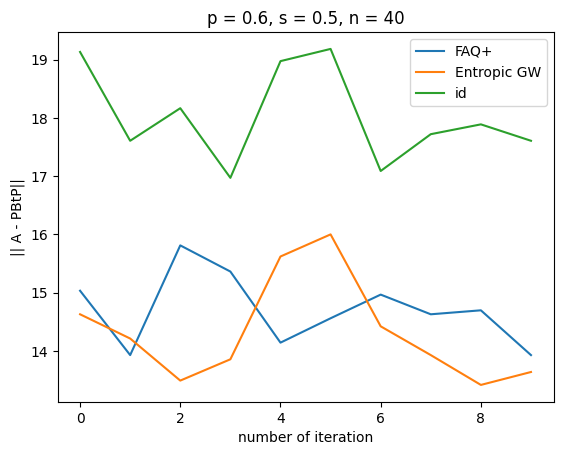

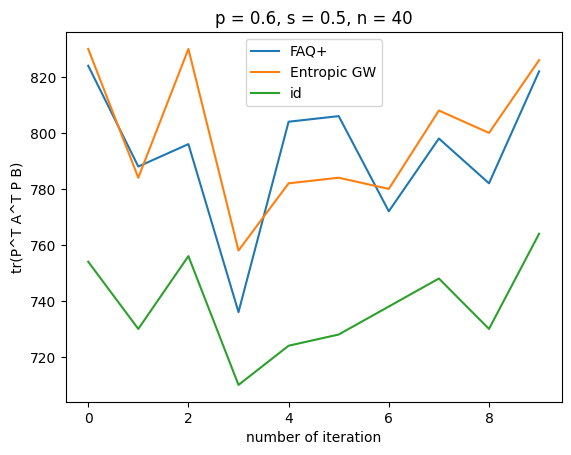

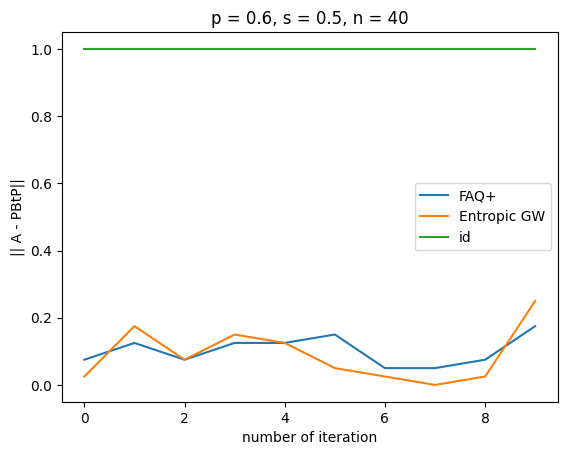

In [5]:
norm_plot_n(L, Label, x, p, s)
plt.show()
norm_plot_n(L_trace, Label, x, p, s, model="trace")
plt.show()
norm_plot_n(Lo, Label, x, p, s)
plt.show()

40
40
40
40
40
40
40
40
40
40


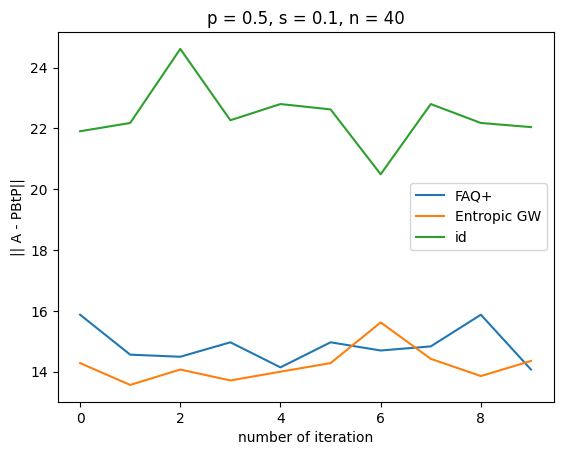

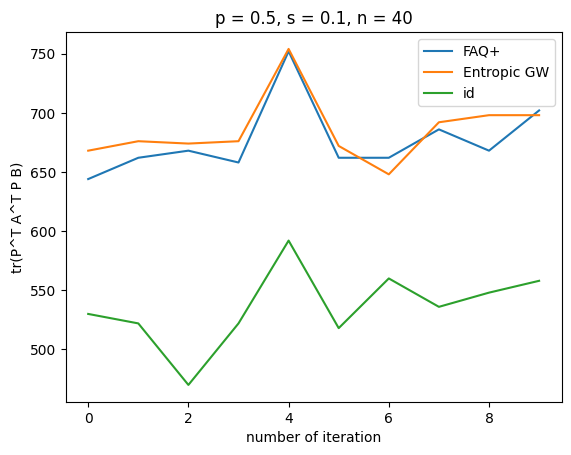

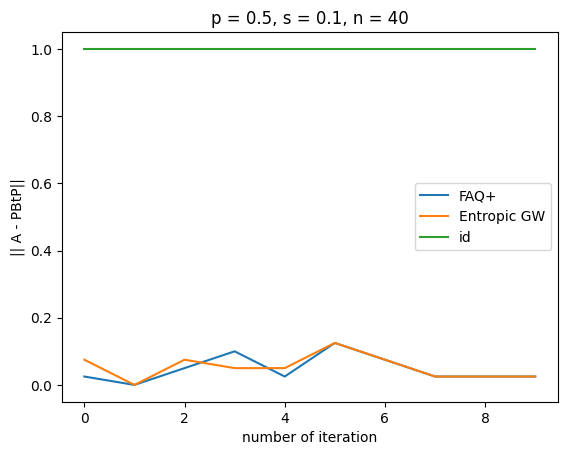

40
40
40
40
40
40
40
40
40
40


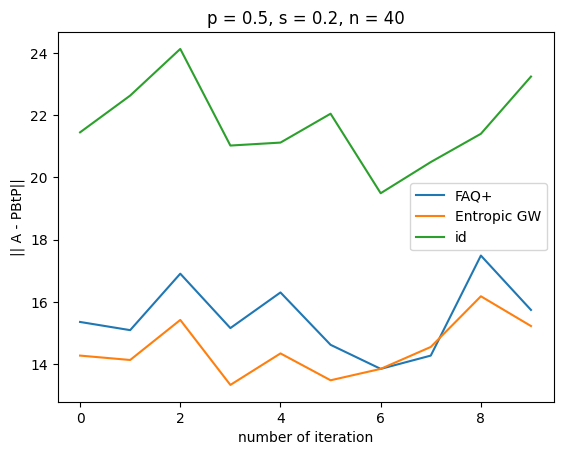

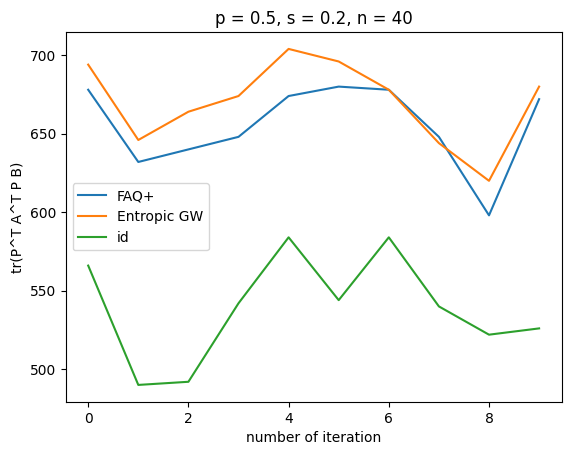

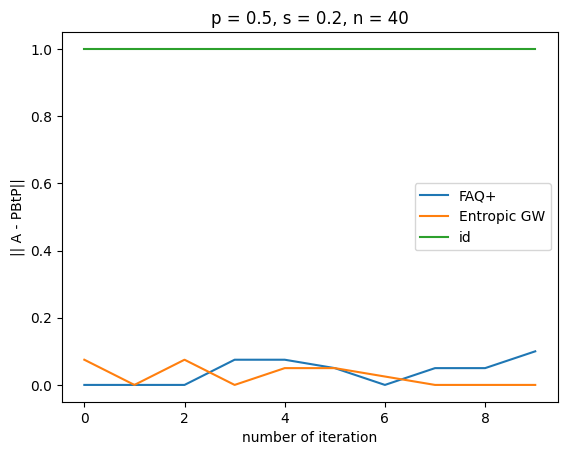

40
40
40
40
40
40
40
40
40
40


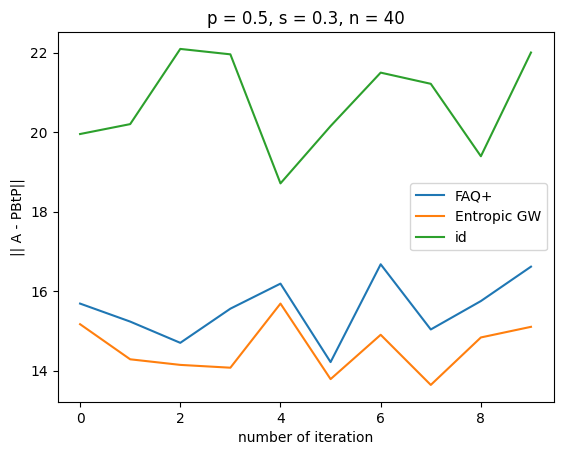

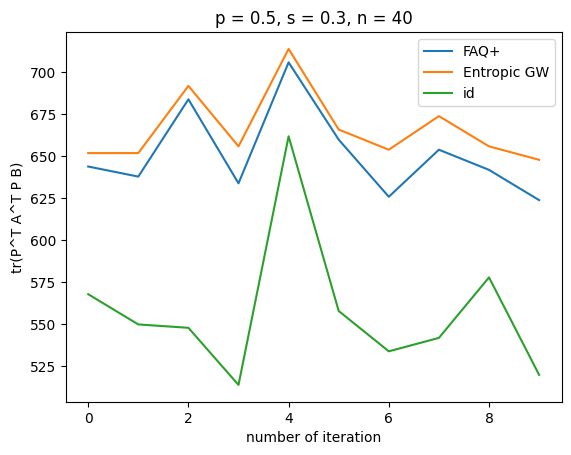

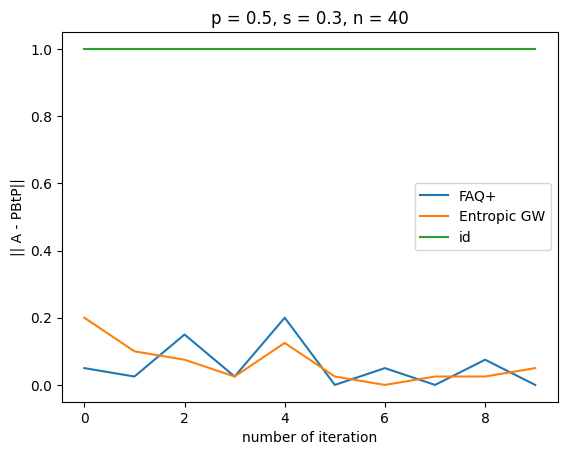

40
40
40
40
40
40
40
40
40
40


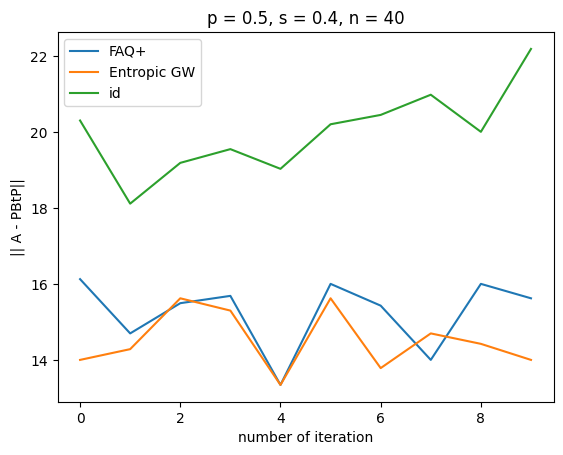

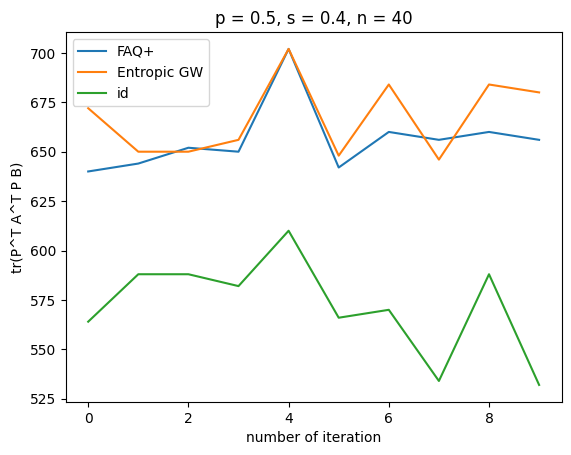

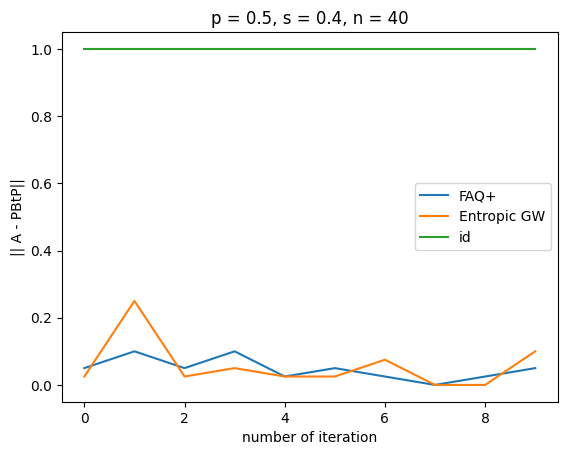

40
40
40
40
40
40
40
40
40
40


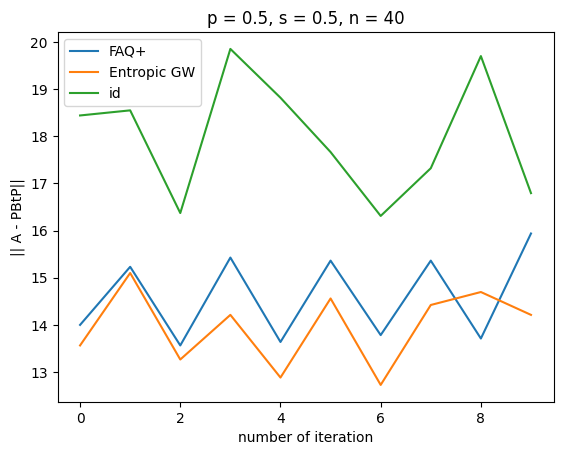

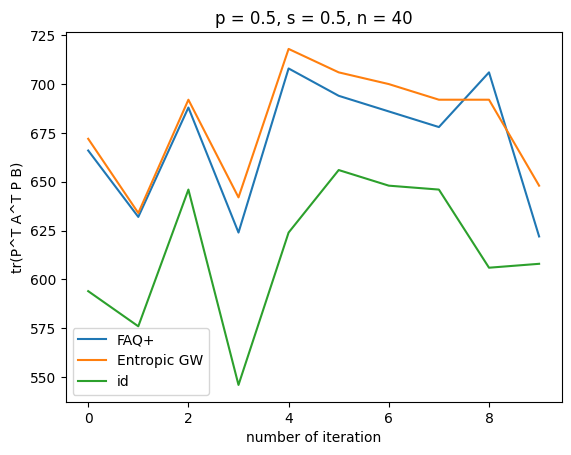

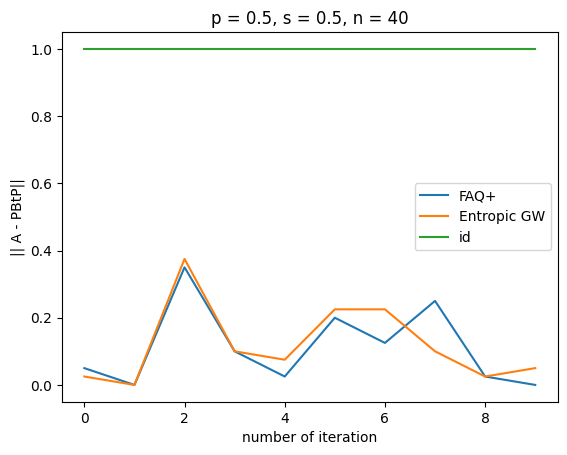

40
40
40
40
40
40
40
40
40
40


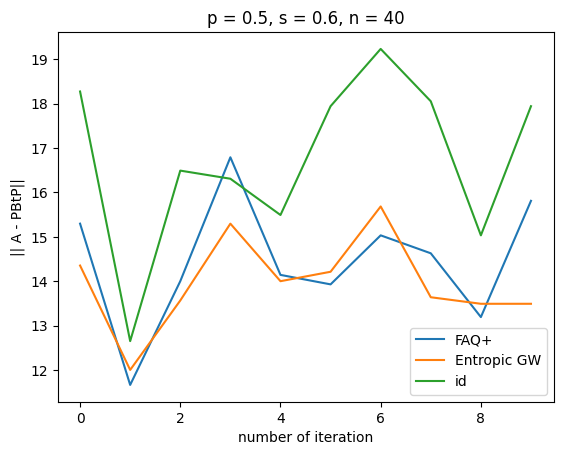

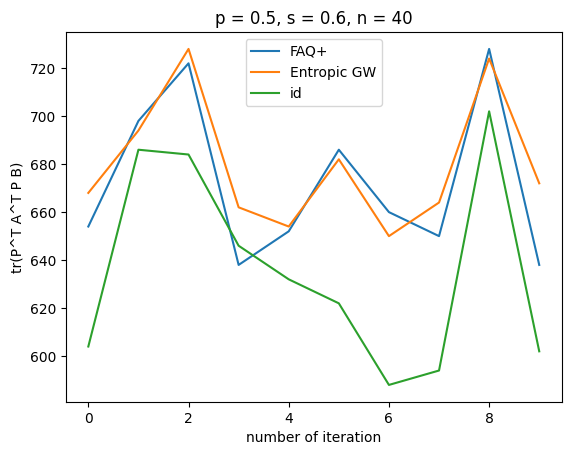

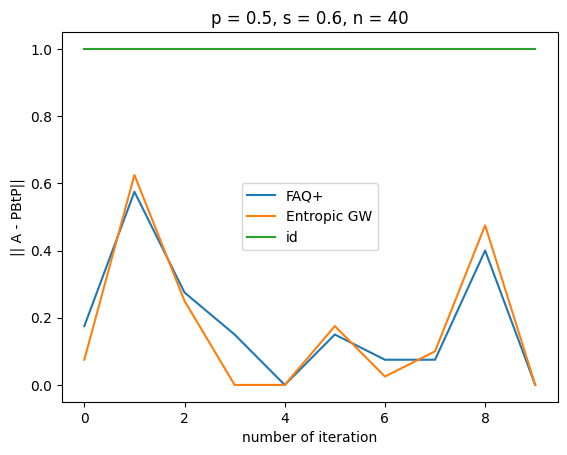

40
40
40
40
40
40
40
40
40
40


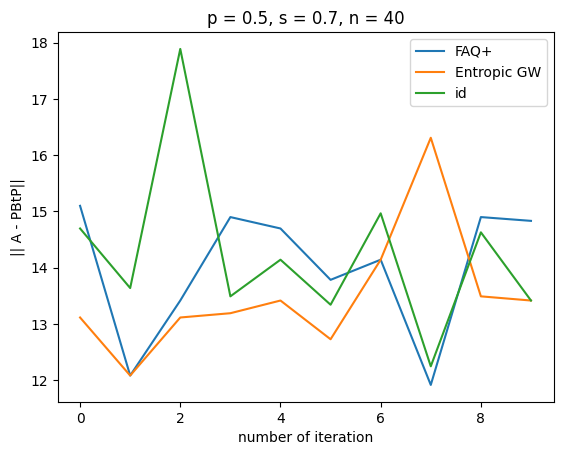

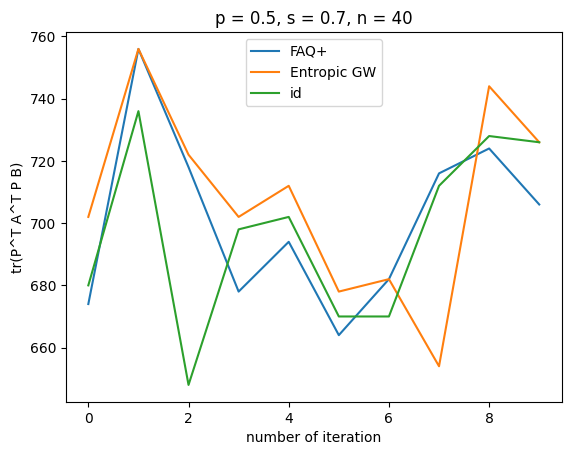

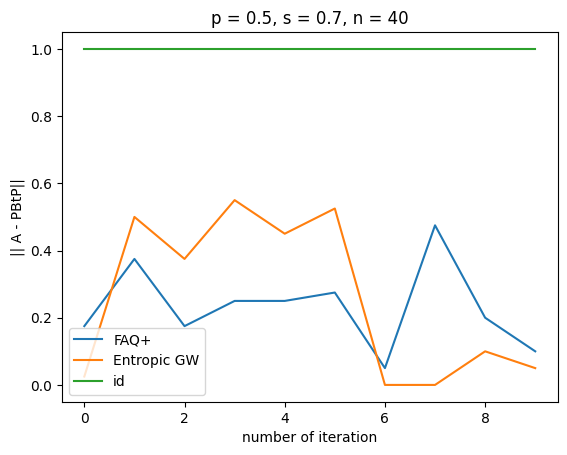

40
40
40
40
40
40
40
40
40
40


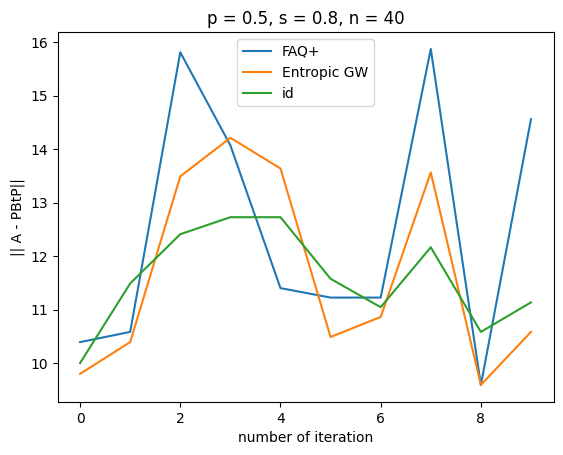

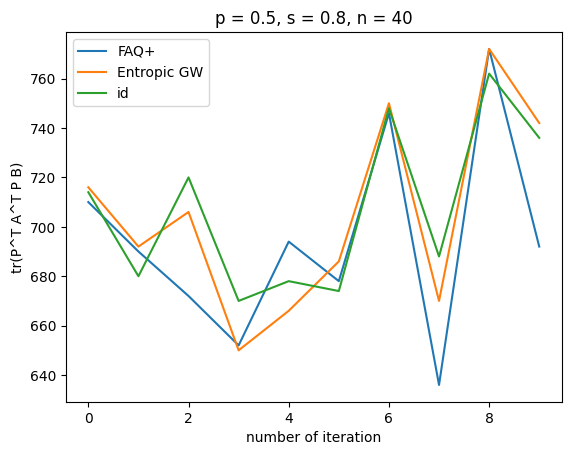

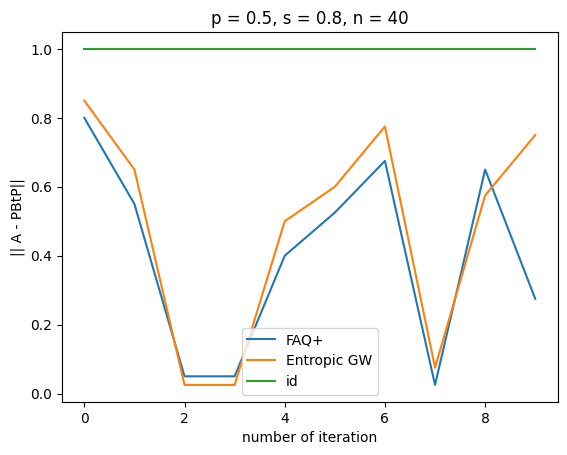

40
40
40
40
40
40
40
40
40
40


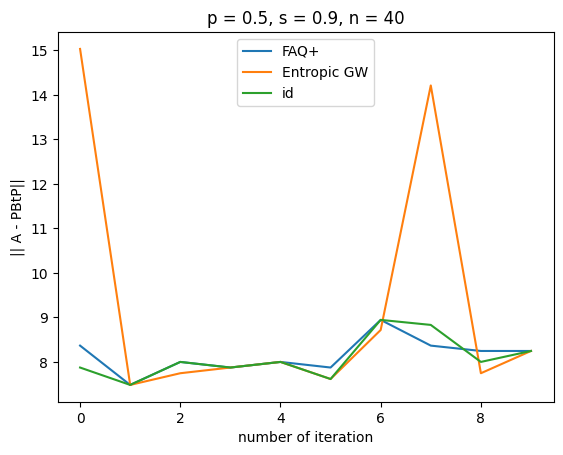

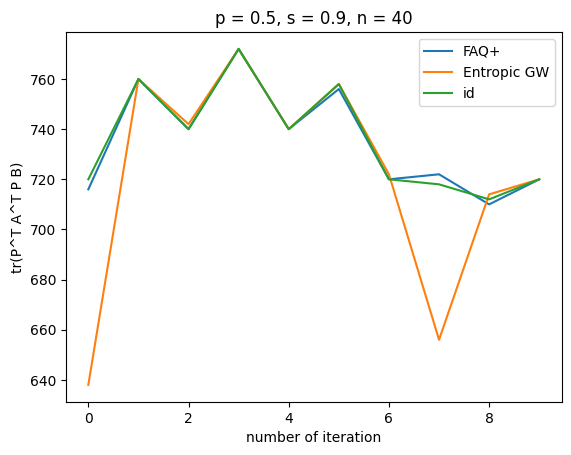

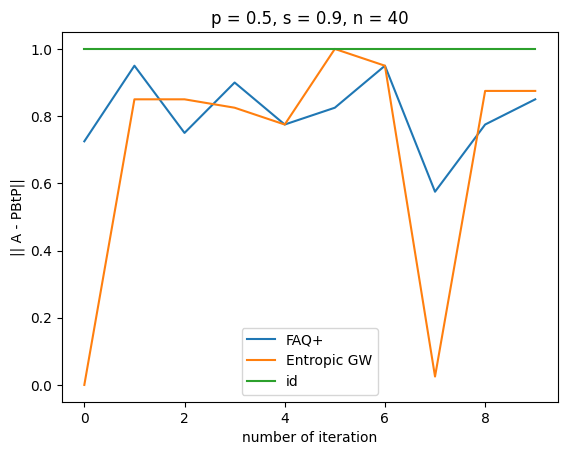

In [10]:
compare_correlation(40, 10, 0.5)

In [19]:
L, L_trace, Lo, Label, x, p, s= construit_non_projected_n(40, 10, 0.6, 0.8)

40
40
40
40
40
40
40
40
40
40


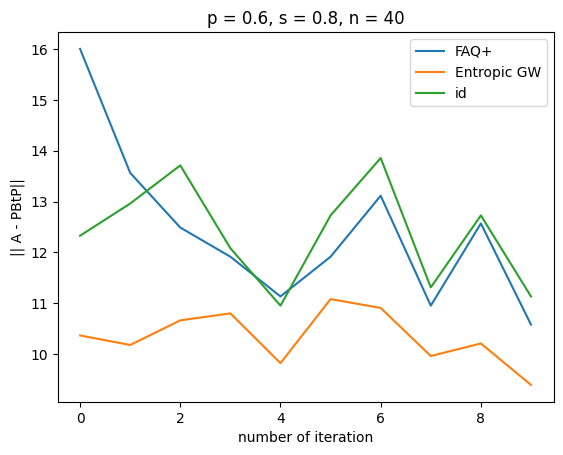

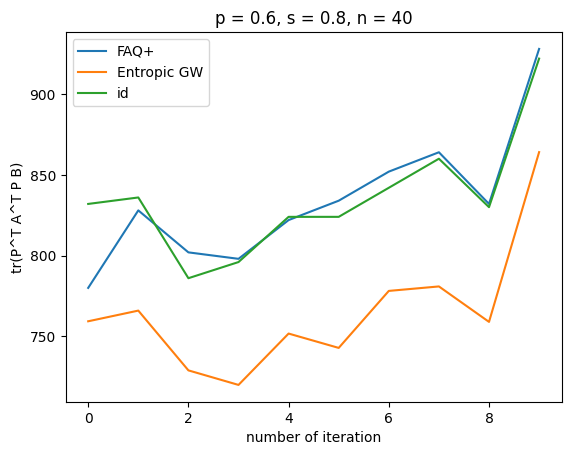

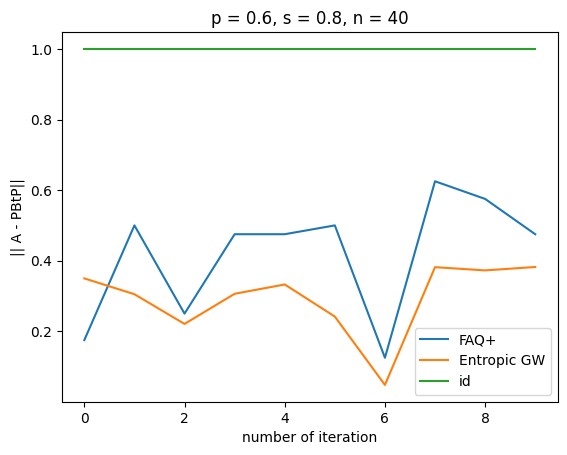

In [20]:
norm_plot_n(L, Label, x, p, s)
plt.show()
norm_plot_n(L_trace, Label, x, p, s, model="trace")
plt.show()
norm_plot_n(Lo, Label, x, p, s)
plt.show()

40
40
40
40
40
40
40
40
40
40


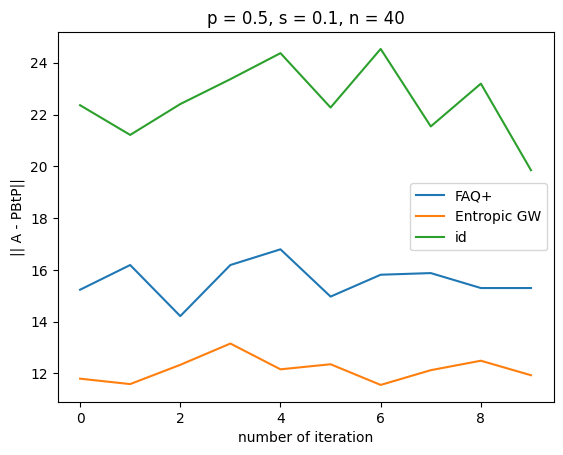

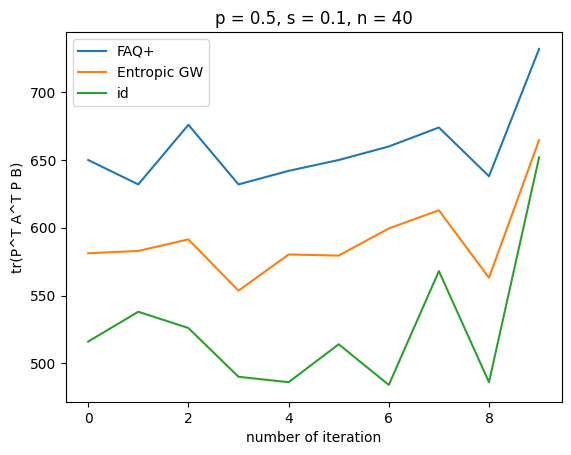

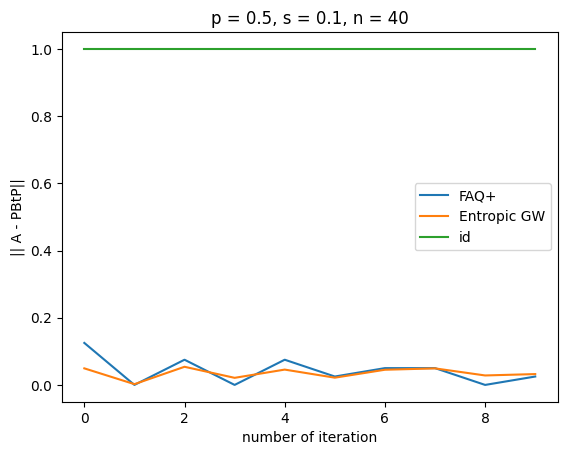

40
40
40
40
40
40
40
40
40
40


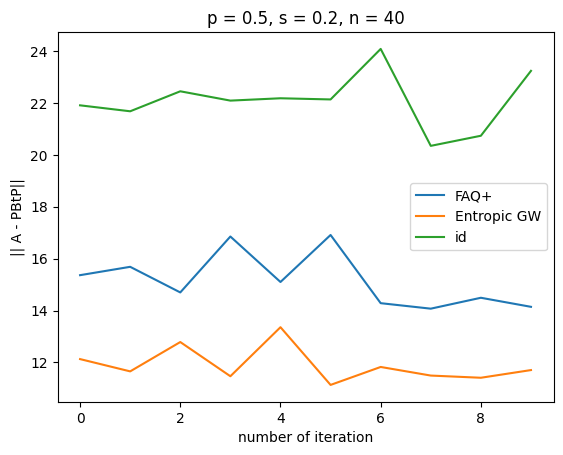

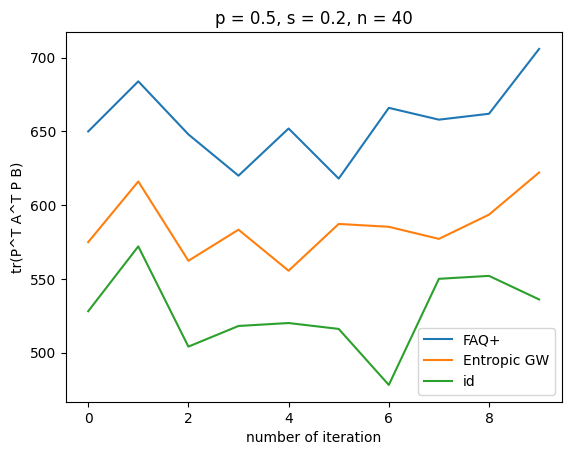

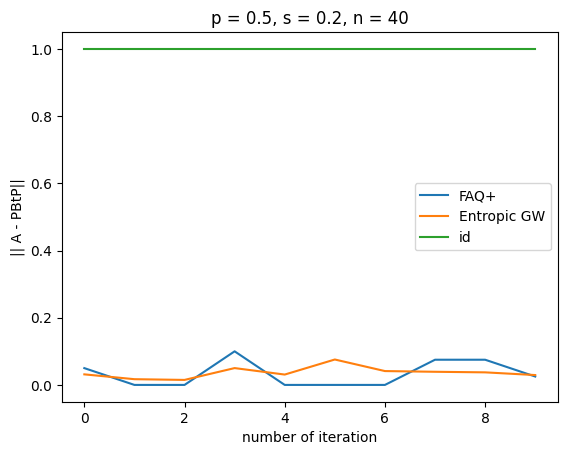

40
40
40
40
40
40
40
40
40
40


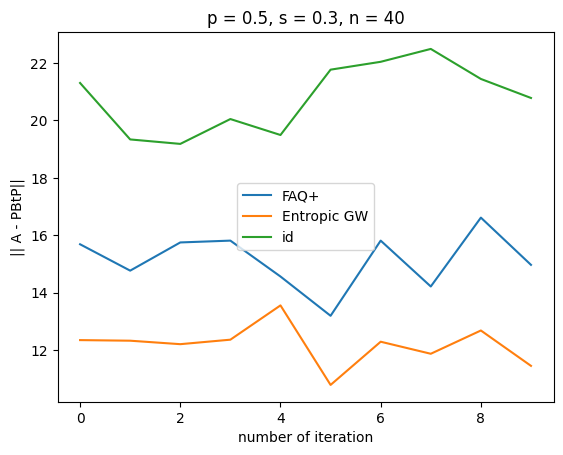

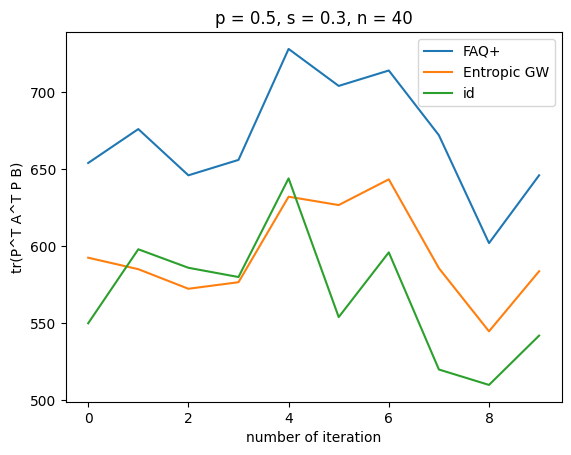

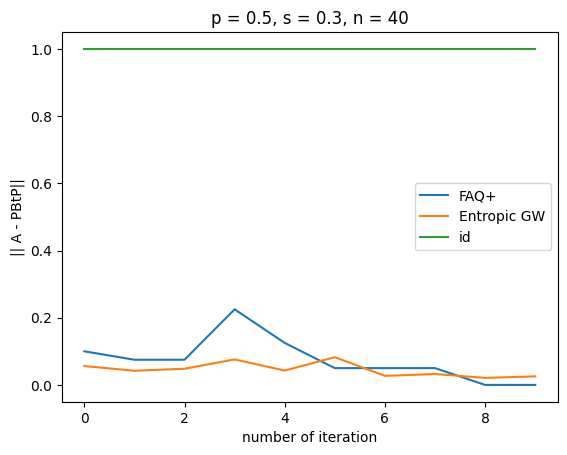

40
40
40
40
40
40
40
40
40
40


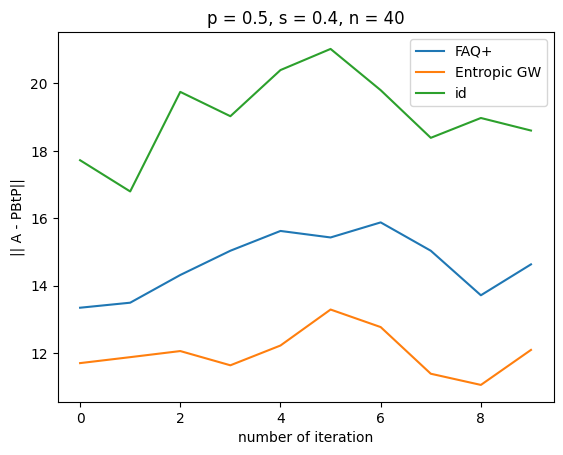

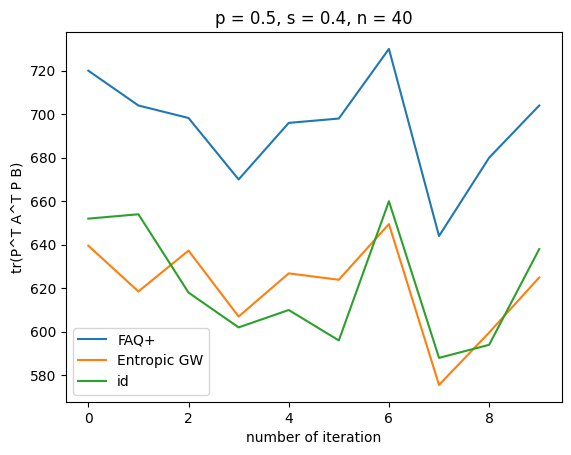

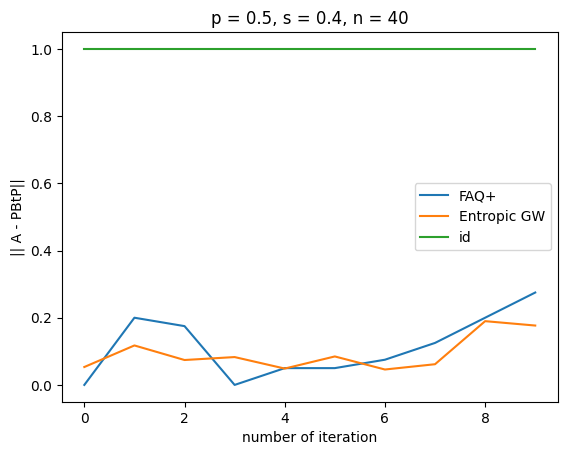

40
40
40
40
40
40
40
40
40
40


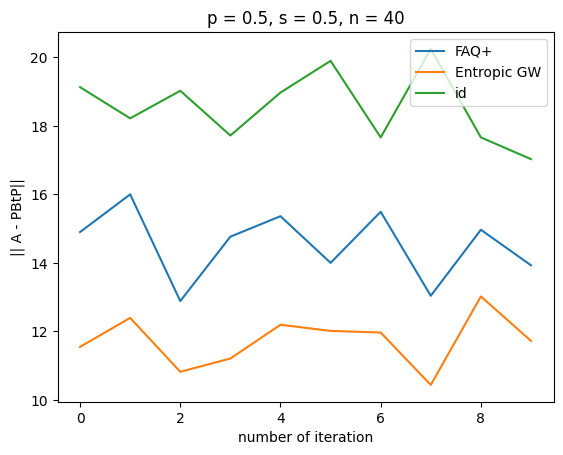

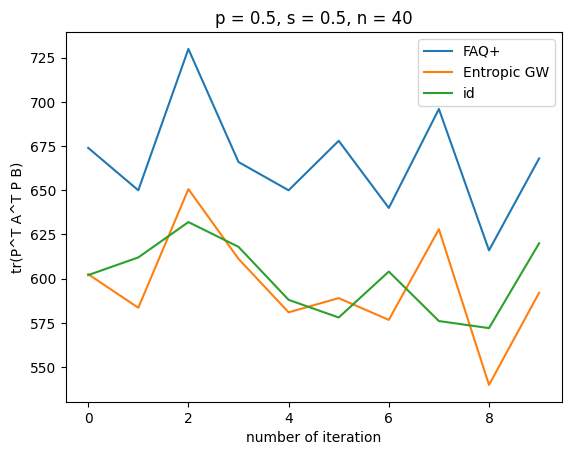

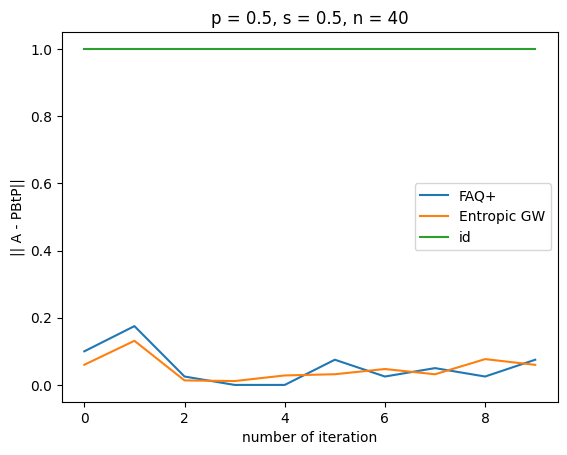

40
40
40
40
40
40
40
40
40
40


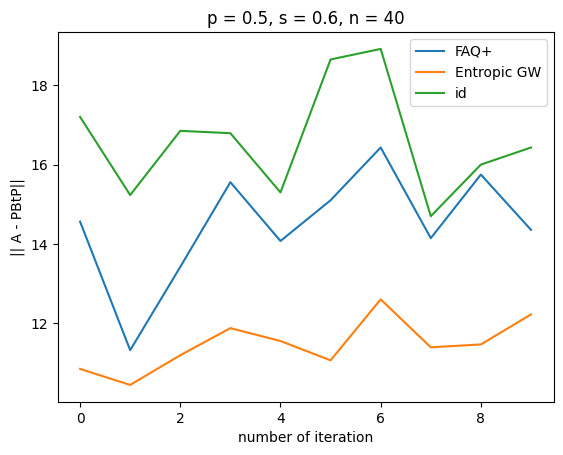

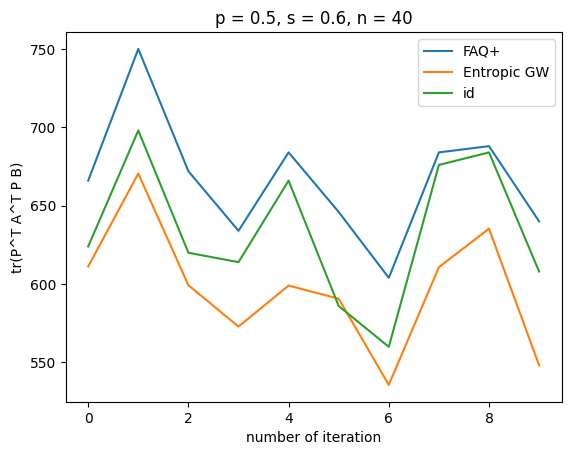

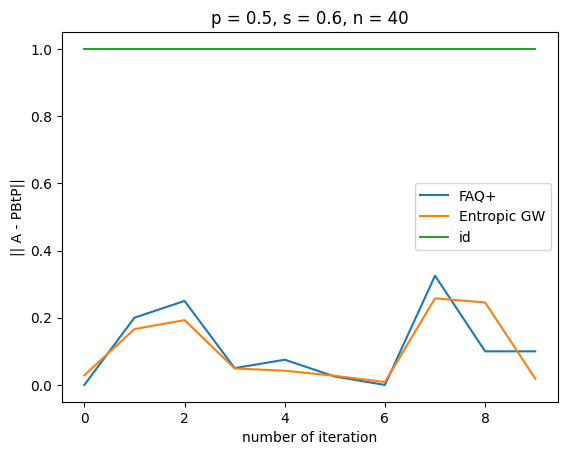

40
40
40
40
40
40
40
40
40
40


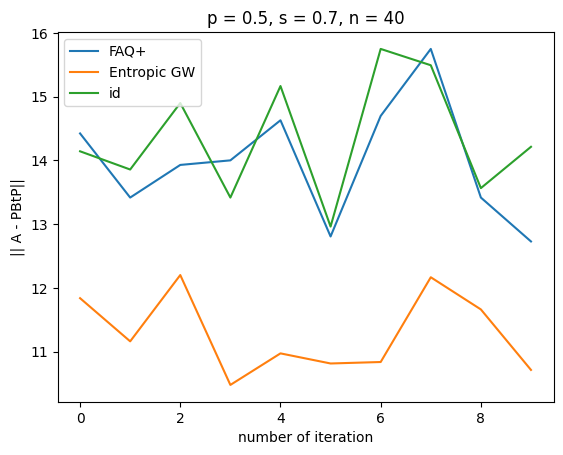

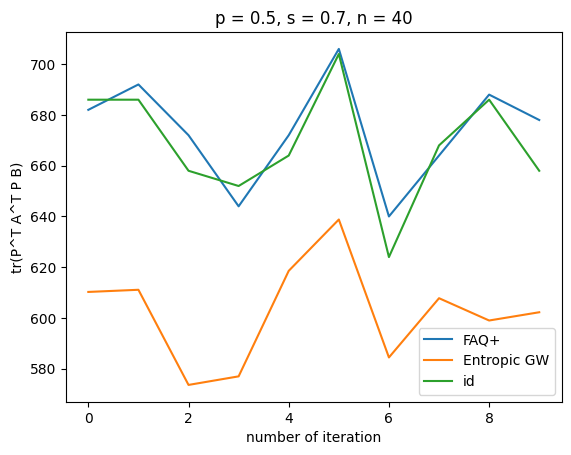

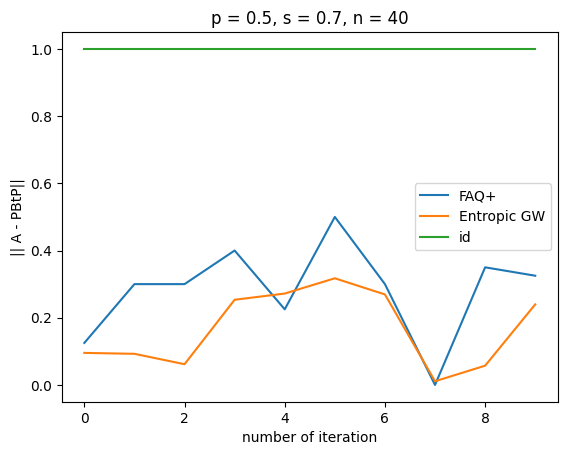

40
40
40
40
40
40
40
40
40
40


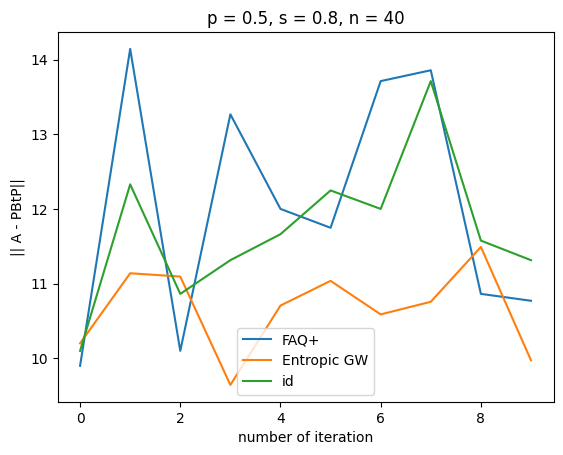

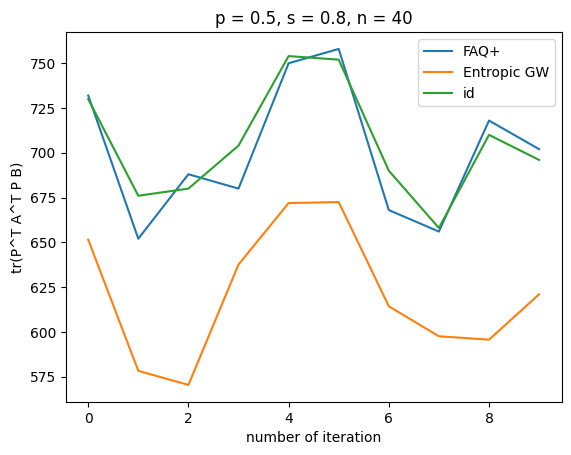

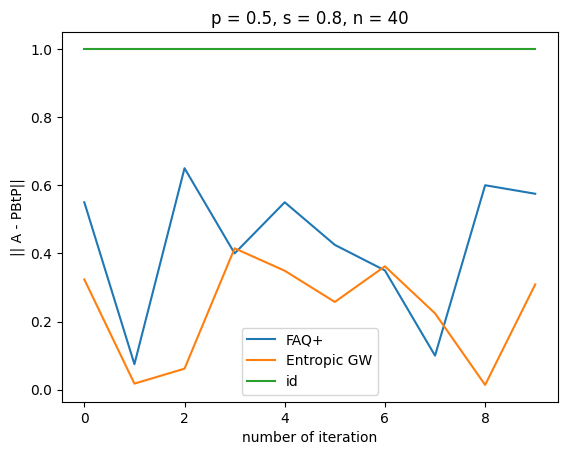

40
40
40
40
40
40
40
40
40
40


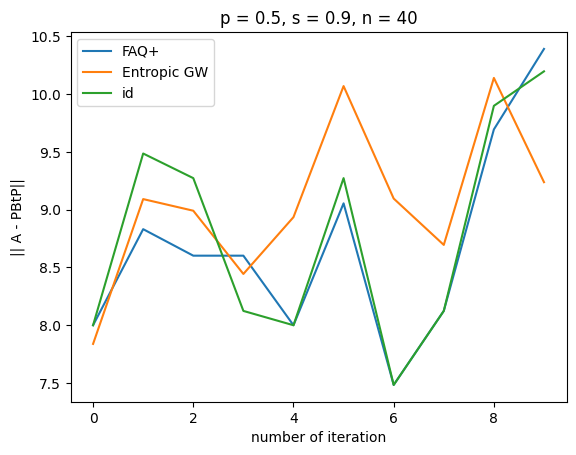

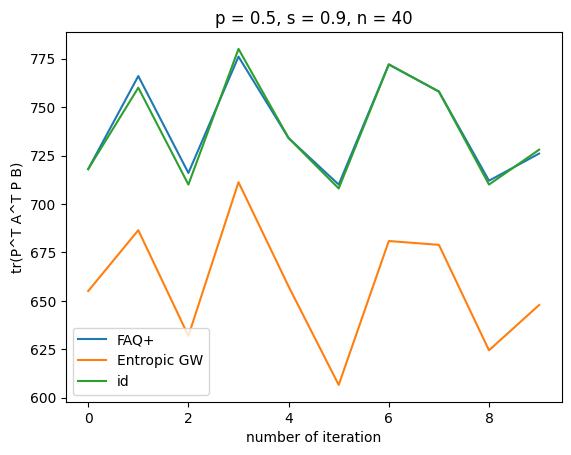

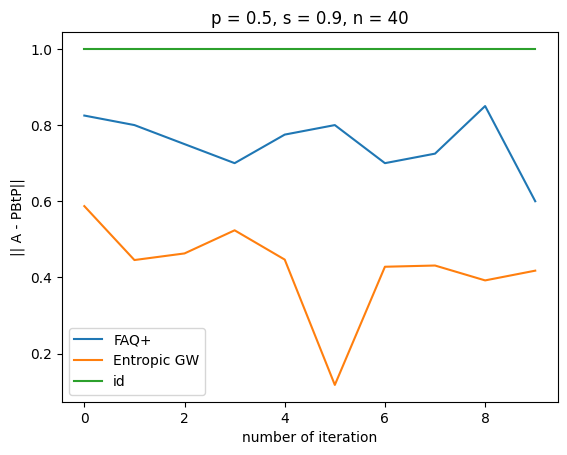

In [23]:
compare_correlation_non_projected(40, 10, 0.5)